# Sine-hysteresis

Here we show how to plot magnetisation as a function of an external magnetic field when a time-varying (sine-wave) field is applied.

In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='sine_hysteresis')

Now we can specify spatial and time varying field components. For the time-varying component, we choose a sine-wave with $5\,\text{GHz}$ frequency and no time shift.

In [2]:
system.energy = mm.Zeeman(H=(0, 0, 1e2), func='sin', f=2e9, t0=0)
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=1e-5)

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, nvdim=3, value=(0, 0.1, 1), norm=1.1e6)

Now, we can drive the system using `TimeDriver`.

In [3]:
td = mc.TimeDriver()
td.drive(system, t=5e-9, n=500)

Running OOMMF (ExeOOMMFRunner)[2023/10/23 16:08]... (1.8 s)


We can plot the $z$-component of the field.

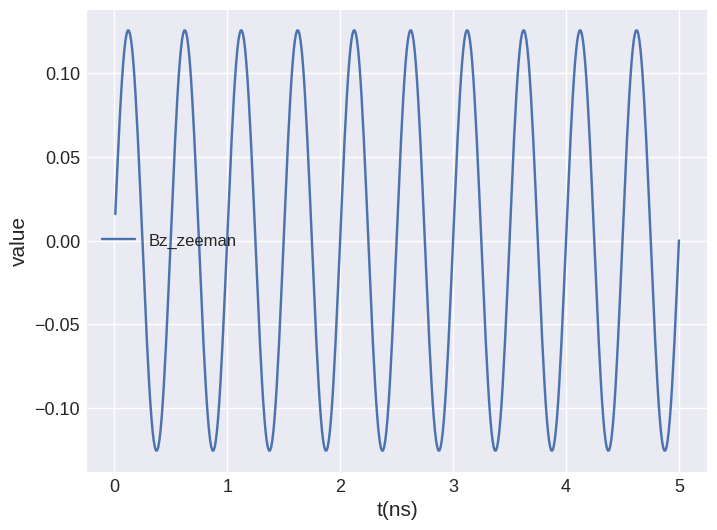

In [4]:
system.table.mpl(y=['Bz_zeeman'])

The $z$-component of magnetisation is:

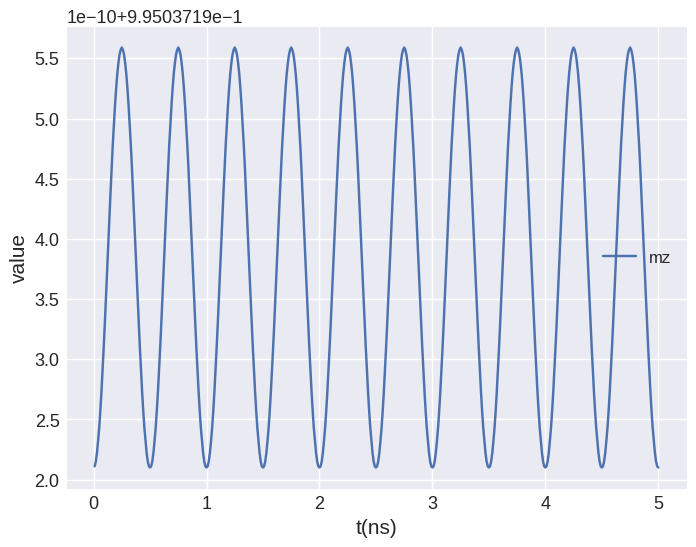

In [5]:
system.table.mpl(y=['mz'])

However, we can plot them so that on the horizontal axis we place external field, and on the vertical axis we place magnetisation.

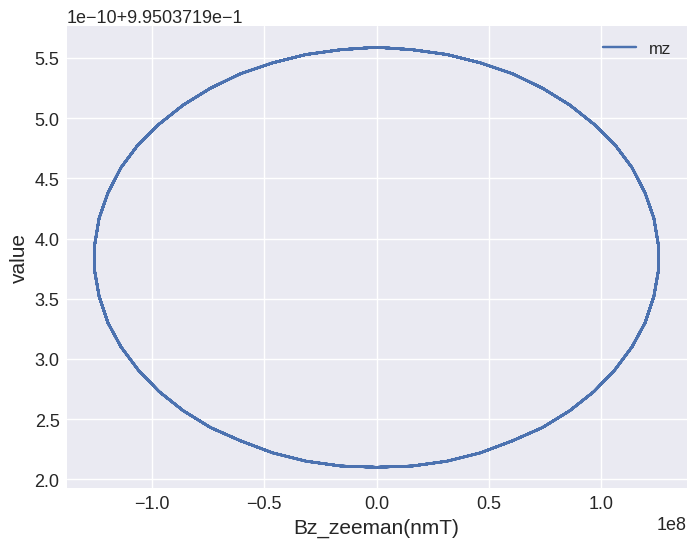

In [6]:
system.table.mpl(x='Bz_zeeman', y=['mz'])